In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [3]:
bm = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/aml_bone_marrow/quantification/healthy_BM/normal_bone_marrow.csv')
aml = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/aml_bone_marrow/quantification/AML/AML.csv')

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_53599/2851056840.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  bm = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/aml_bone_marrow/quantification/healthy_BM/normal_bone_marrow.csv')


In [64]:
bm

CD19      ASMA       CD4      CD44      CD71     CD271      CD90  \
0       0.635958  0.471304  0.341072  0.052372  0.519640  0.377627  0.102366   
1       0.234598  0.482261  0.605216  0.185311  0.761581  0.390987  0.035872   
2       0.222422  0.498447  0.636258  0.250054  0.957736  0.482735  0.579884   
3       0.333615  0.462209  0.594836  0.094583  0.493624  0.350734  0.041616   
4       0.413143  0.458818  0.639790  0.187459  0.532472  0.423685  0.153343   
...          ...       ...       ...       ...       ...       ...       ...   
886520  0.730957  0.536065  1.018522  0.631627  0.829153  0.646345  0.351415   
886521  0.733641  0.530946  0.509524  0.337657  0.600458  0.665746  0.618660   
886522  0.575626  0.631906  0.681686  0.901300  0.978607  0.629994  0.335544   
886523  0.779029  0.592717  0.745327  0.788631  0.709830  1.211243  2.088245   
886524  0.940160  0.462133  0.865623  1.083292  0.551655  0.597003  0.336778   

             VIM      CD68    SPINK2  ...       CD56  NAKATPASE       RowSum  \
0       0.356934  0.516020  0.367927  ...  21.666667  20.788618   522.065041   
1       0.295122  0.480176  0.043507  ...  16.983471  18.975207   674.727273   
2       0.262495  0.368985  0.348405  ...  10.323944  23.845070   803.253521   
3       0.396020  0.397740  0.190946  ...  14.415385  18.276923   551.569231   
4       0.228610  0.494665  0.380412  ...  17.229412  18.976471   574.064706   
...          ...       ...       ...  ...        ...        ...          ...   
886520  0.518416  0.845883  0.866838  ...   4.061404  46.982456   800.929825   
886521  0.563854  0.829757  0.623655  ...   4.926667  35.720000   673.100000   
886522  0.480129  0.670313  0.543252  ...   4.521368  47.179487   687.282051   
886523  0.728595  0.866948  1.702557  ...   5.351485  50.559406  1146.415842   
886524  0.916345  0.775945  0.755586  ...   4.873832  32.313084   737.112150   

        cluster_anno_l1           cluster_anno_l2  cluster_anno_coarse  \
0             Erythroid                  Artifact             Artifact   
1             Erythroid                  Artifact             Artifact   
2         Megakaryocyte              Undetermined             Artifact   
3             Erythroid  Early Myeloid Progenitor              Myeloid   
4             Erythroid                  Artifact             Artifact   
...                 ...                       ...                  ...   
886520        Erythroid                 Erythroid            Erythroid   
886521          Myeloid      Intermediate Myeloid              Myeloid   
886522        Erythroid                 Erythroid            Erythroid   
886523  Autofluorescent           Autofluorescent             Artifact   
886524      CD8+ T-Cell               CD8+ T-Cell             Lymphoid   

           Sex  Age         Ethnicity  Neighborhoods_k15_window10cells  
0       Female   68               NaN                              NaN  
1       Female   68               NaN                              NaN  
2       Female   68               NaN                              NaN  
3       Female   68               NaN             HSC / Mature Myeloid  
4       Female   68               NaN                              NaN  
...        ...  ...               ...                              ...  
886520  Female   54  African-American       Erythroid/Myeloid/Lymphoid  
886521  Female   54  African-American       Early Myeloid / Arteriolar  
886522  Female   54  African-American       Erythroid/Myeloid/Lymphoid  
886523  Female   54  African-American                              NaN  
886524  Female   54  African-American       Erythroid/Myeloid/Lymphoid  

[886525 rows x 69 columns]

In [65]:
aml

NPM1C      ASMA       CD4      CD44      CD71     CD271      CD90  \
0       0.480105  0.543401  0.606254  0.717089  0.366238  0.658986  0.430127   
1       0.457366  0.528902  0.467225  0.356837  0.565917  0.396484  0.281615   
2       0.724056  0.628502  0.938241  0.774803  1.082865  0.681783  1.026582   
3       0.606363  0.565137  0.640740  0.540788  0.772965  1.127113  0.870655   
4       0.542769  0.512336  0.594116  0.517860  0.498790  0.747234  0.885107   
...          ...       ...       ...       ...       ...       ...       ...   
327558  0.333625  0.553712  0.404150  0.235899  0.649551  0.466577  0.989240   
327559  0.760729  0.520157  0.433990  0.484369  0.547603  0.476208  0.422813   
327560  0.390039  0.557206  0.455825  0.192531  0.374790  0.510499  1.229854   
327561  0.369404  0.525439  0.419605  0.306143  0.718748  0.460573  0.475666   
327562  0.346636  0.497359  0.447797  0.172958  0.222437  1.024116  0.619021   

             VIM      CD68    SPINK2  ...      RowSum  \
0       0.440930  0.285169  0.816717  ...  481.666667   
1       0.427504  0.346968  0.358214  ...  302.951923   
2       0.539046  0.813125  1.143670  ...  671.498246   
3       0.809693  0.436097  0.623515  ...  536.489362   
4       0.769394  0.353489  0.388670  ...  456.000000   
...          ...       ...       ...  ...         ...   
327558  0.415174  0.256287  0.409313  ...  383.869110   
327559  0.420727  0.660943  0.407695  ...  385.055046   
327560  0.493910  0.289585  0.861677  ...  502.071161   
327561  0.443087  0.279608  0.645248  ...  373.496644   
327562  0.419923  0.365403  0.444781  ...  408.936620   

        classified_cluster_anno_l2  classified_cluster_anno_l2_score  \
0                        Erythroid                          1.000000   
1                          B-Cells                          1.000000   
2                        Erythroid                          0.892877   
3                              AEC                          0.363936   
4         Early Myeloid Progenitor                          0.847315   
...                            ...                               ...   
327558                   Erythroid                          1.000000   
327559           NPM1 Mutant Blast                          0.574674   
327560                   Erythroid                          0.981803   
327561                   Erythroid                          0.930238   
327562                   Erythroid                          0.329137   

        classified_cluster_anno_coarse  classified_cluster_anno_coarse_score  \
0                            Erythroid                              1.000000   
1                             Lymphoid                              1.000000   
2                            Erythroid                              1.000000   
3                                  AEC                              0.363936   
4                              Myeloid                              0.850347   
...                                ...                                   ...   
327558                       Erythroid                              1.000000   
327559                     Macrophages                              0.574674   
327560                       Erythroid                              0.981803   
327561                       Erythroid                              0.930238   
327562                       Erythroid                              0.329137   

        Sample_Group  Sample_Timepoint   Sex  Age  \
0                NSM               NSM  Male   62   
1                NSM               NSM  Male   62   
2                NSM               NSM  Male   62   
3                NSM               NSM  Male   62   
4                NSM               NSM  Male   62   
...              ...               ...   ...  ...   
327558           AML           Post-Tx  Male   73   
327559           AML           Post-Tx  Male   73   
327560           AML           Post-Tx  Male   73   
327561   

In [4]:
bm.drop(columns=['nCount_CODEX', 'nFeature_CODEX', 'CellID', 'x.coord', 'y.coord', 'RowSum', 'cluster_anno_l1', 'cluster_anno_coarse', 'Sex', 'Age', 'Ethnicity','Neighborhoods_k15_window10cells'], inplace=True) 
bm.rename(columns={'cluster_anno_l2': 'cell_type'}, inplace=True)
bm = reorder_columns(bm, 'orig.ident', 'NAKATPASE')
bm = reorder_columns(bm, 'Size', 'NAKATPASE')

In [5]:
aml.drop(columns=['nCount_CODEX', 'nFeature_CODEX', 'CellID', 'x.coord', 'y.coord', 'RowSum', 'Sex', 'Age',
                  'Neighborhoods_k15_window10cells', 'Sample_Group', 'classified_cluster_anno_coarse_score', 'classified_cluster_anno_coarse',
                  'classified_cluster_anno_l2_score', 'Sample_Timepoint'], inplace=True)
aml.rename(columns={'classified_cluster_anno_l2': 'cell_type'}, inplace=True)
aml = reorder_columns(aml, 'orig.ident', 'NAKATPASE')
aml = reorder_columns(aml, 'Size', 'NAKATPASE')

In [6]:
# Filter out celltypes with less than 10 cells
aml = aml.groupby('cell_type').filter(lambda x: len(x) >= 10)

In [9]:
aml['cell_type'].value_counts()

cell_type
Erythroid                   72564
Mature Myeloid              50112
NPM1 Mutant Blast           39861
Intermediate Myeloid        32178
Early Myeloid Progenitor    23877
Monocytes                   14983
Erythroblast                14072
Plasma Cells                12420
B-Cells                      9600
CD4+ T-Cell                  8097
SEC                          8000
CD8+ T-Cell                  7537
Macrophages                  7009
Adipocyte                    5960
Immature_B_Cell              5377
pDC                          3603
Adipo-MSC                    2857
Non-Classical Monocyte       1831
GATA1pos_Mks                 1679
AEC                          1452
HSPC                          747
THY1+ MSC                     738
VSMC                          619
GATA1neg_Mks                  554
GMP                           478
GMP/Myeloblast                469
Endosteal                     413
SPINK2+ HSPC                  401
CD34+ CD61+                    30
MEP/

In [7]:
bm.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/aml_bone_marrow/quantification/healthy_BM/processed/normal_bone_marrow_cleaned.csv', index=False)
aml.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/aml_bone_marrow/quantification/AML/processed/AML_cleaned.csv', index=False)

In [82]:
bm.drop(columns=['NAKATPASE', 'DAPI'], inplace=True)
aml.drop(columns=['NAKATPASE', 'DAPI'], inplace=True)

In [83]:
X_columns = bm.columns[:bm.columns.get_loc('Size')]
obs_columns =bm.columns[bm.columns.get_loc('Size'):]
adata_bm = ad.AnnData(
    X=bm[X_columns],
    obs=bm[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [84]:
X_columns = aml.columns[:aml.columns.get_loc('Size')]
obs_columns =aml.columns[aml.columns.get_loc('Size'):]
adata_aml = ad.AnnData(
    X=aml[X_columns],
    obs=aml[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [85]:
ad_list = [adata_bm, adata_aml]

In [86]:
adata_bm.X.max()

255.0

In [87]:
for add in ad_list:
    add.raw = add.copy()
    add.X = np.arcsinh(add.X/150)
    add.layers['zscore'] = z_score_normalization(add.X)


In [88]:
for add in ad_list:
    add.obs['cell_type'] = add.obs['cell_type'].astype('category')
    sc.pp.neighbors(add)
    sc.tl.umap(add)

KeyboardInterrupt: 

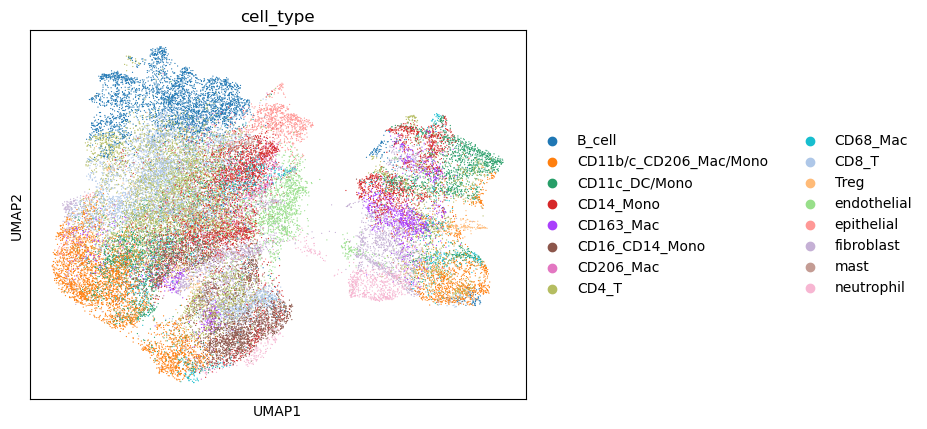

In [101]:
sc.pl.umap(adata_aml, color='cell_type')

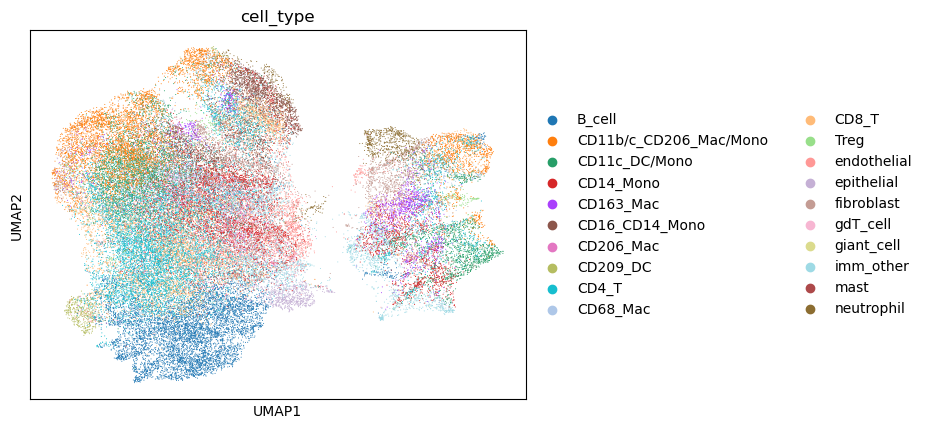

In [102]:
sc.pl.umap(adata_bm, color='cell_type')

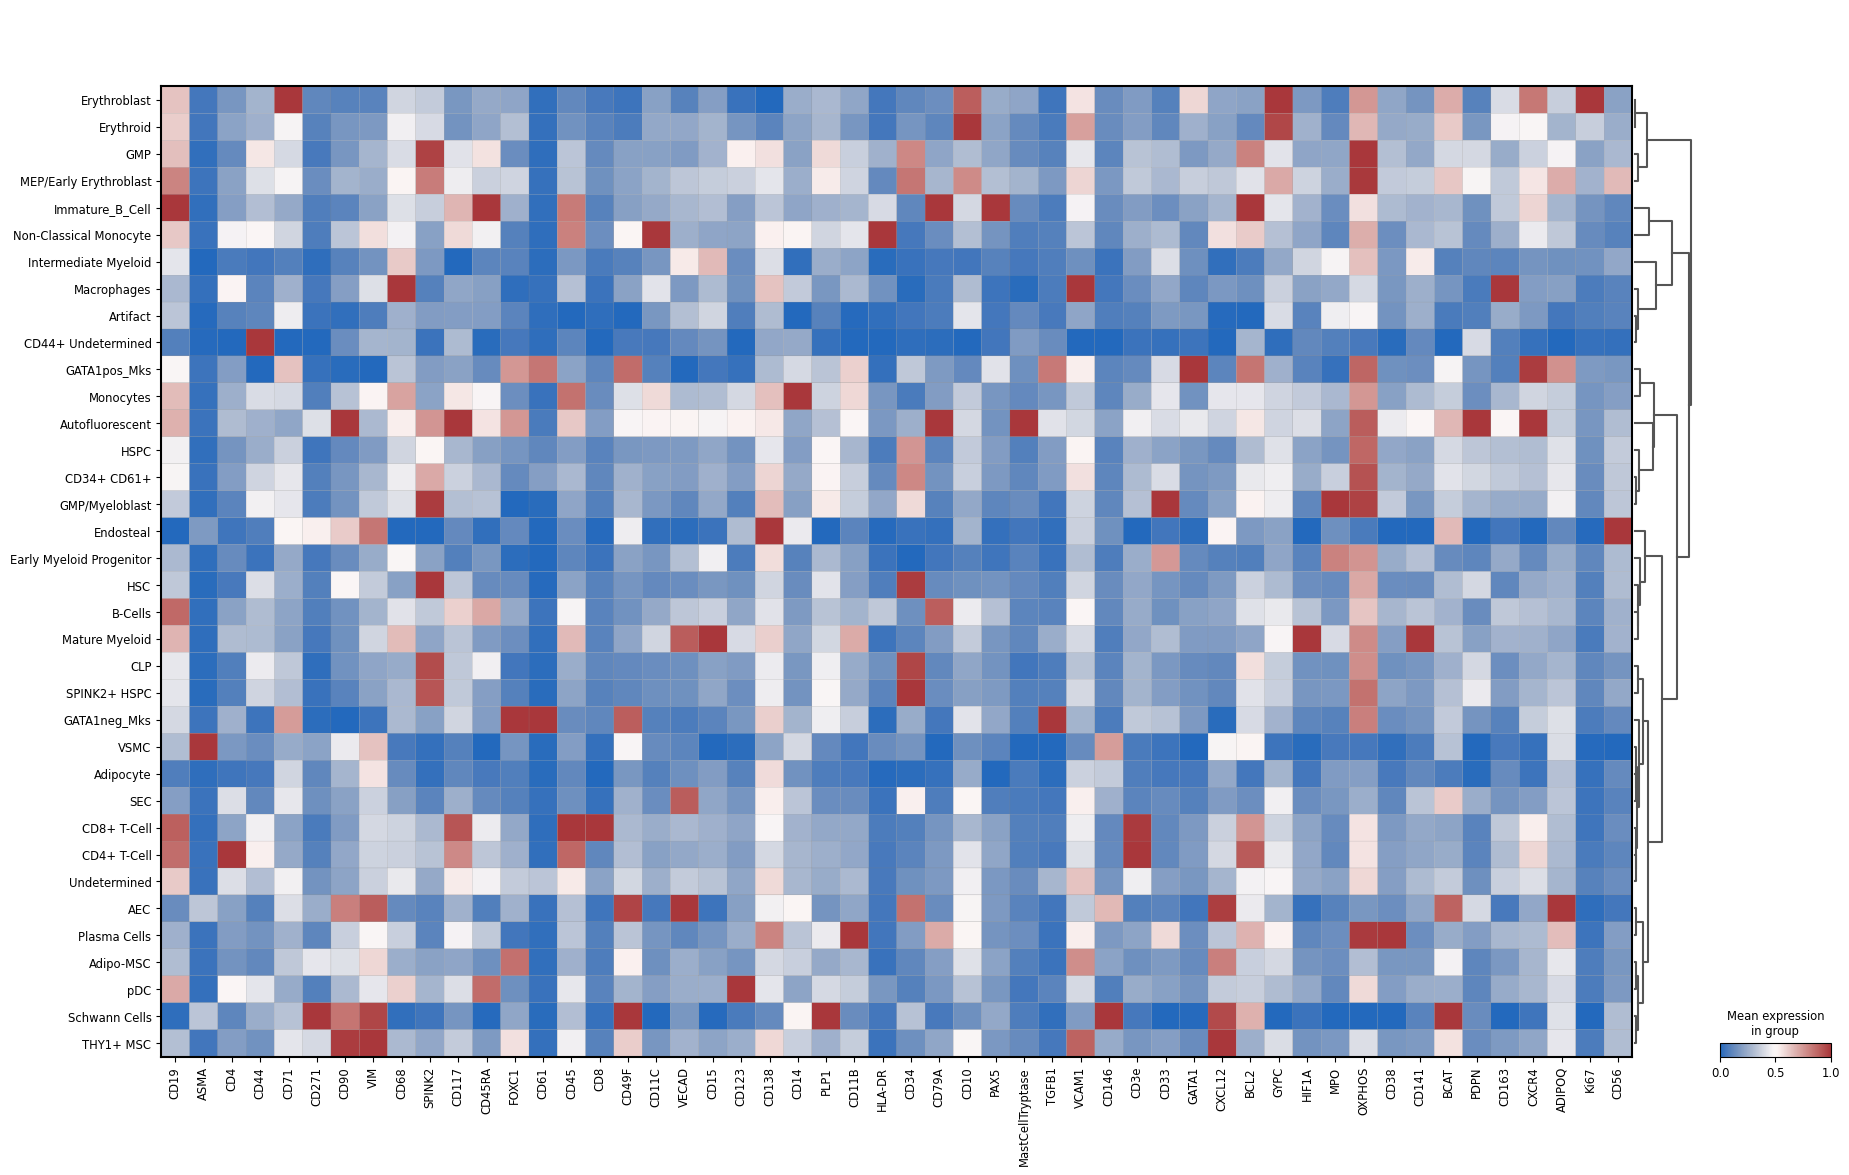

In [92]:
sc.pl.matrixplot(adata_bm, var_names=adata_bm.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Nonclassical monocytes without CD16? Mature myeloid maybe more likely some granulocyte, but CD141 should be on cDC1, maybe gated inside. Autofluorescent cells should be Mast cells? With CD117 and Tryptase

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 52 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


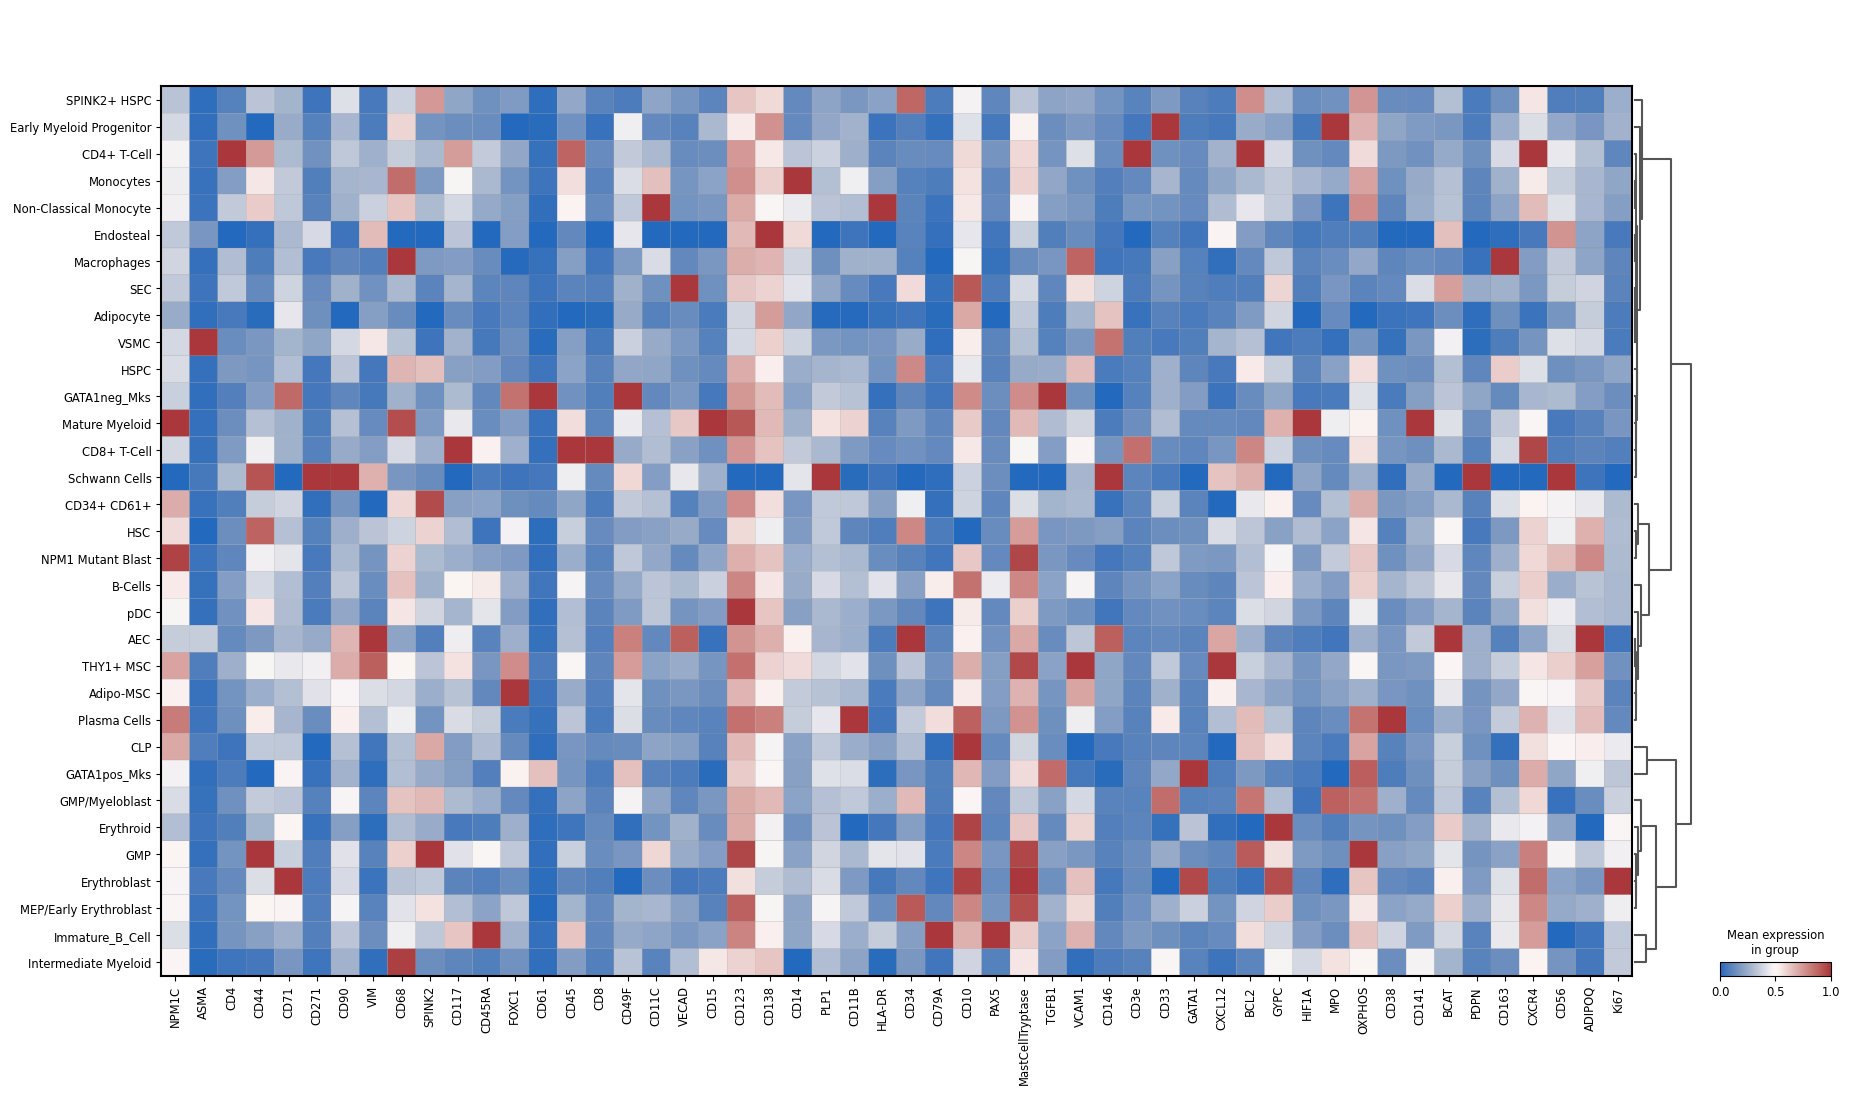

In [93]:
sc.pl.matrixplot(adata_aml, var_names=adata_aml.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Staining of CD138 and CD123 a bit unspecific. No undetermined? mDCs not there

In [94]:
for add in ad_list:
    sc.tl.rank_genes_groups(add, groupby='cell_type' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-pa

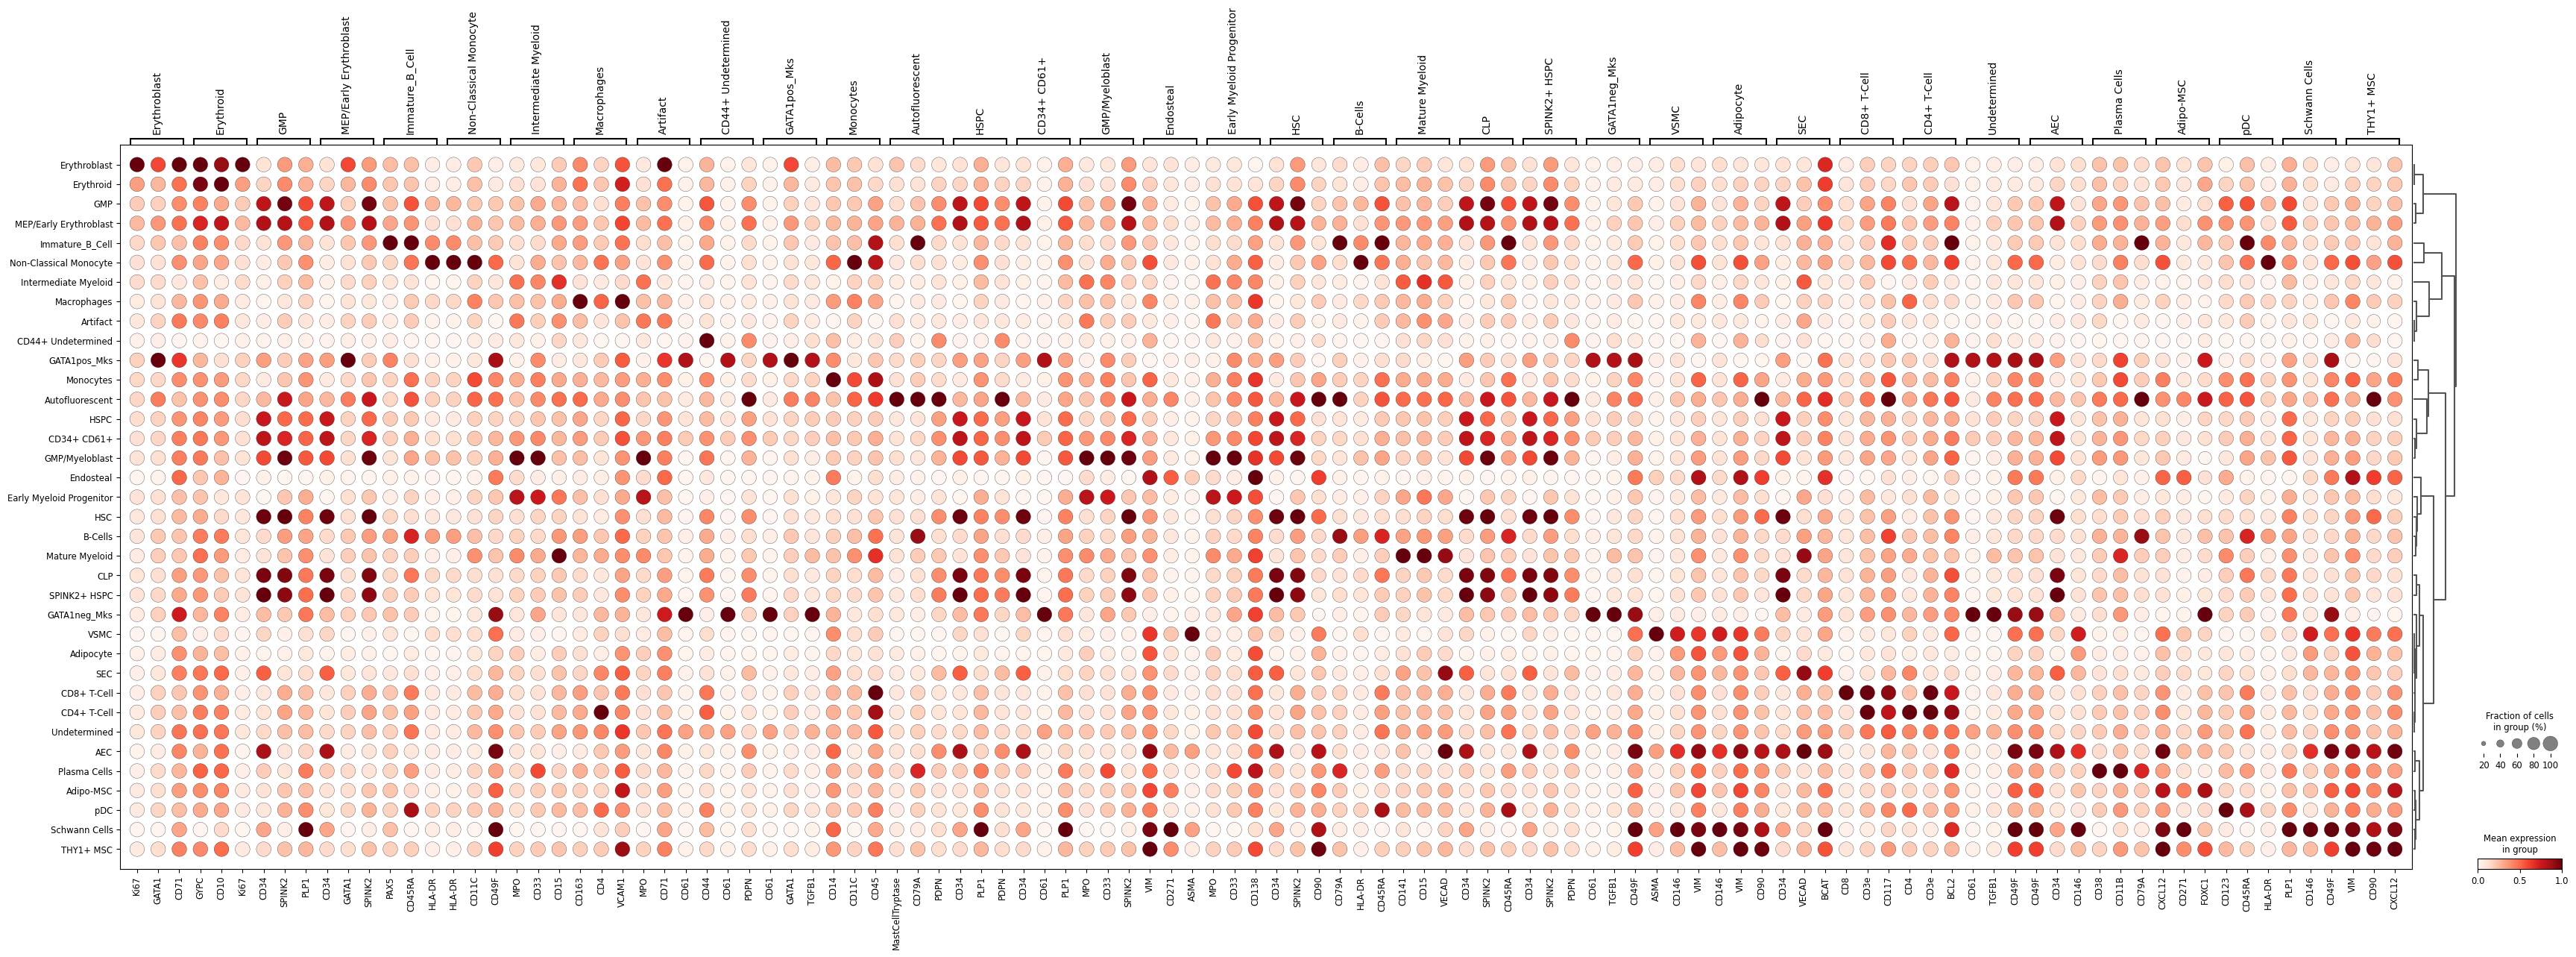

In [97]:
sc.pl.rank_genes_groups_dotplot(adata_bm, n_genes=3, standard_scale='var')

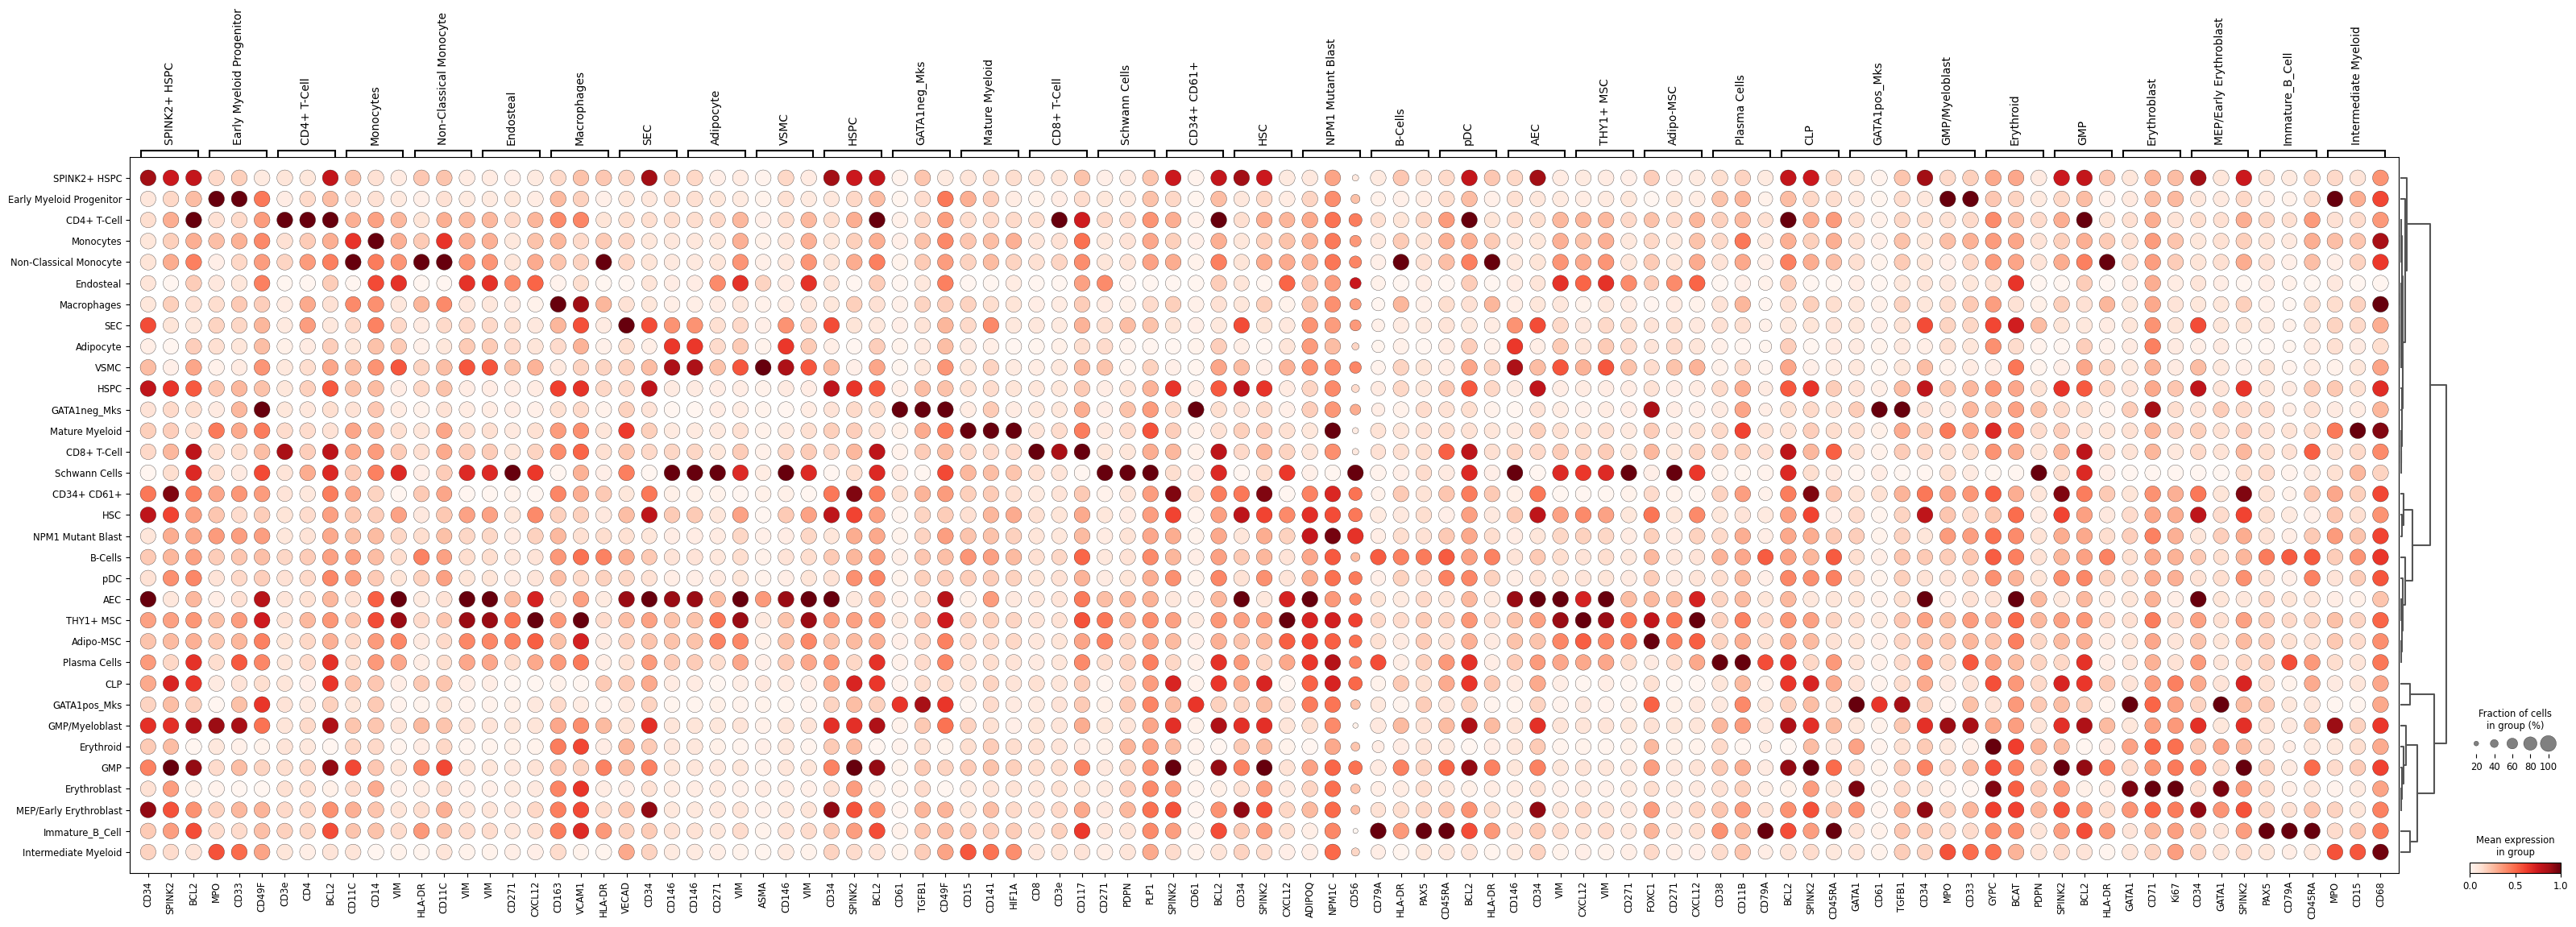

In [98]:
sc.pl.rank_genes_groups_dotplot(adata_aml, n_genes=3, standard_scale='var')

In [99]:
sc.tl.filter_rank_genes_groups(adata_bm, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')
sc.tl.filter_rank_genes_groups(adata_aml, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

categories: AEC, Adipo-MSC, Adipocyte, etc.
var_group_labels: AEC, Adipo-MSC, Autofluorescent, etc.


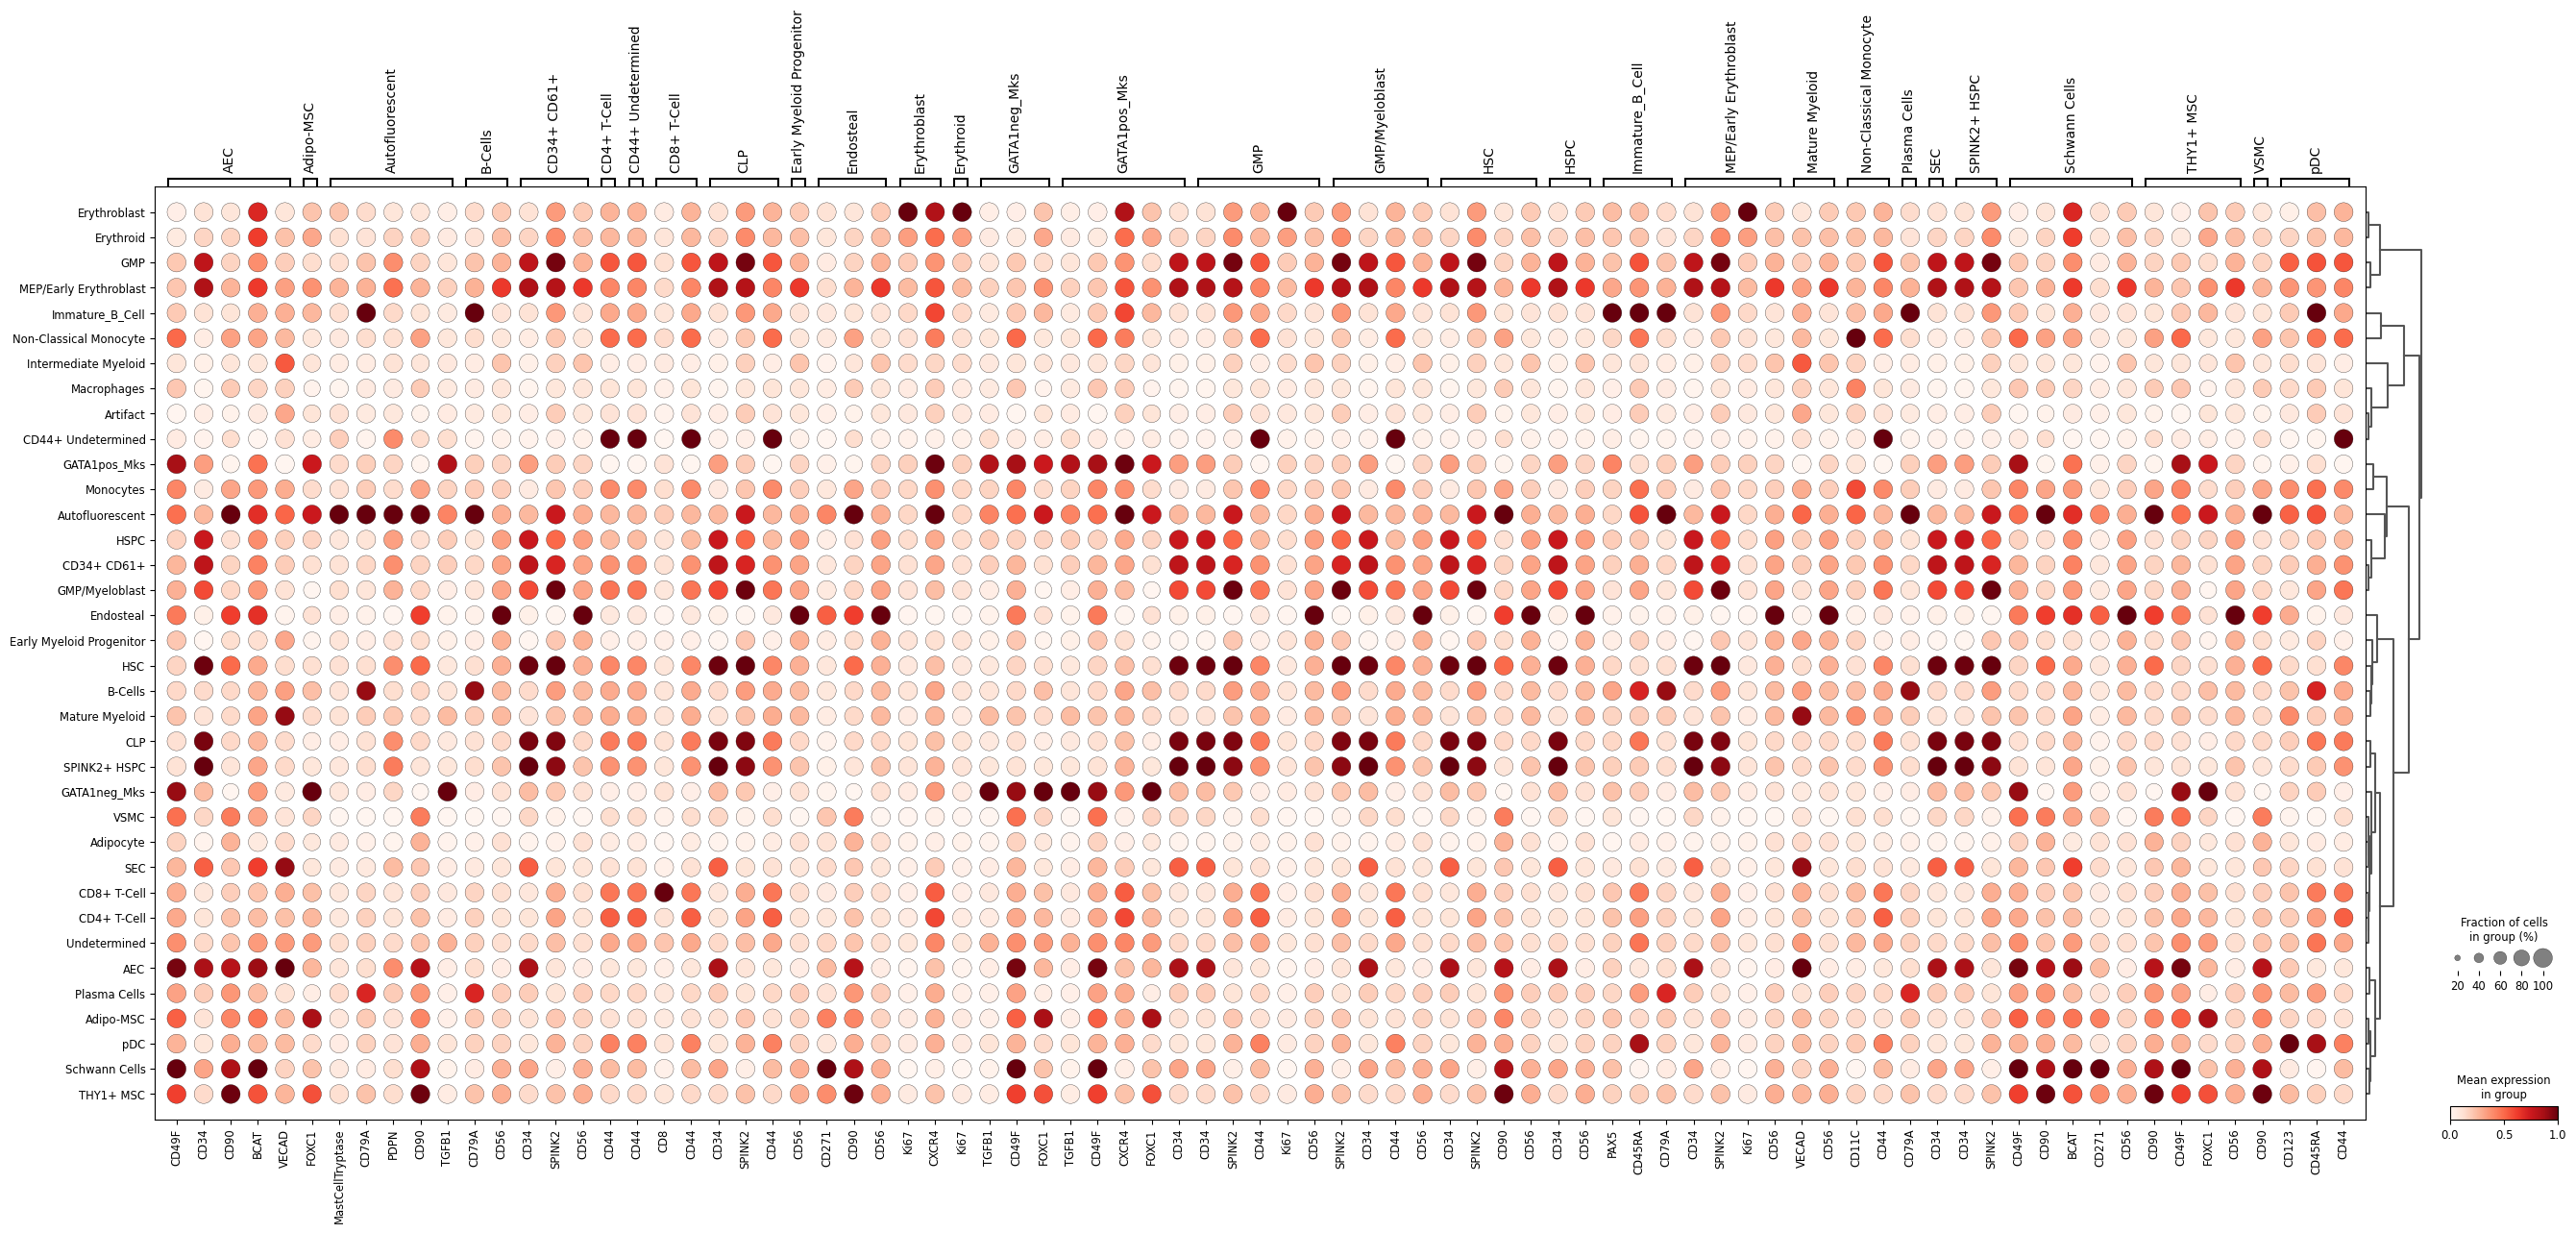

In [100]:
sc.pl.rank_genes_groups_dotplot(adata_bm, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')

categories: AEC, Adipo-MSC, Adipocyte, etc.
var_group_labels: AEC, Adipo-MSC, Adipocyte, etc.


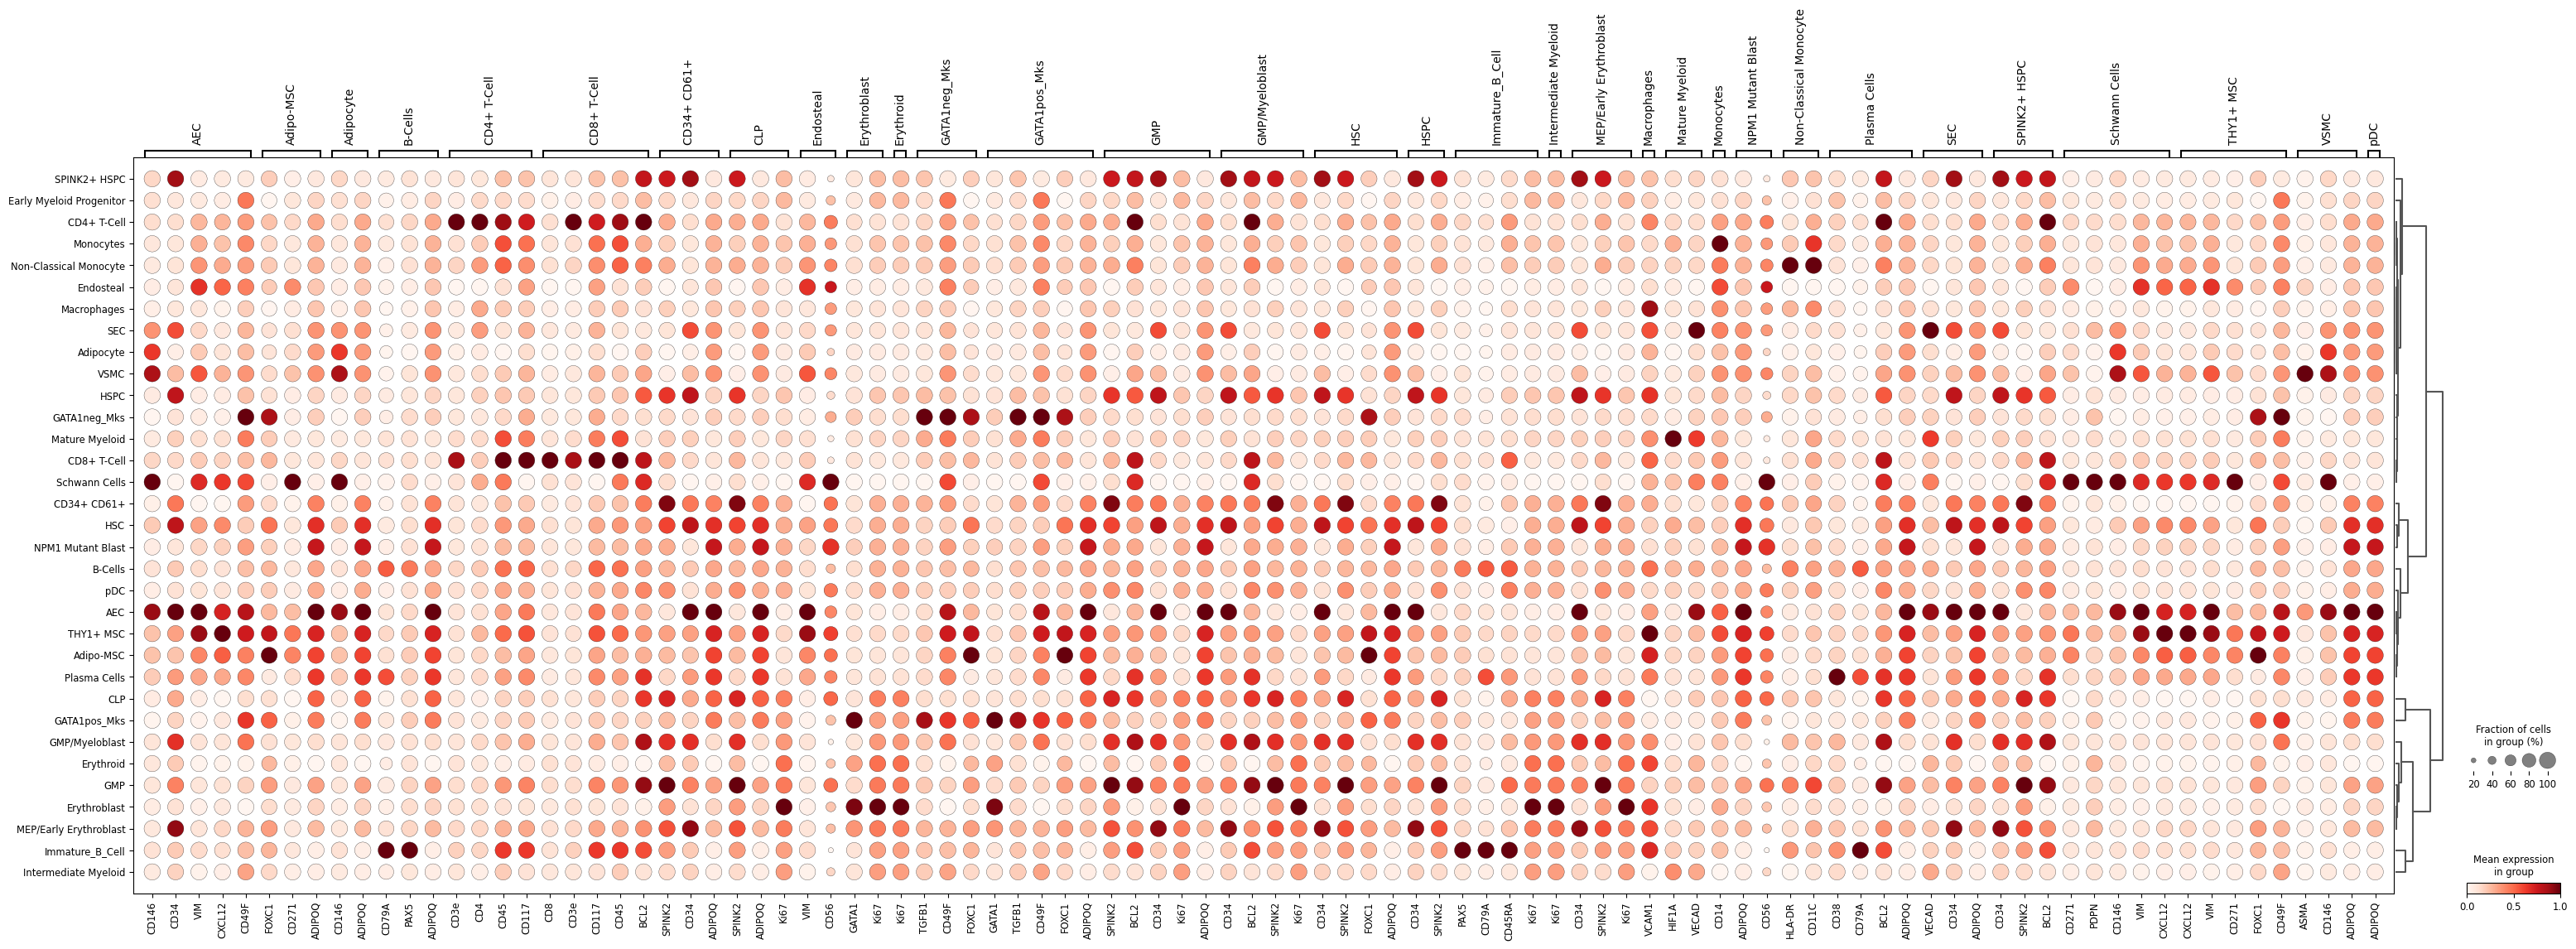

In [101]:
sc.pl.rank_genes_groups_dotplot(adata_aml, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')